<a href="https://colab.research.google.com/github/fariqwar/Pathloss-Python/blob/main/Tubes_Python_for_Model_and_Simulation_Fariq_Wardana_Al_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tubes Python for Model and Simulation**

###**COST231 Model**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Fungsi Pathloss#
def pathloss(d,fc,area,ht,hr):
  if fc >= 400 and fc <= 1500:
    c1 = 69.55
    c2 = 26.16
  elif fc > 1500 and fc <= 2000:
    c1 = 46.3
    c2 = 33.9
  if area == 'urban':
    cm = 0
  elif area == 'suburban':
    cm = -2*((np.log10((fc/28)**2))-5.4) 
  elif area == 'open':
    cm = -4.78*(np.log10(fc))+18.33*(np.log10(fc))-40.94
  else:
    cm = 'Tipe Area Tidak Dikenali'

  ahr = (1.1*np.log10(fc)-0.7)*hr-(1.56*np.log10(fc)-1.8)
  lp = c1+(c2*np.log10(fc))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-cm

  return lp

In [3]:
#Parameter yang digunakan
dmin = 300 #Jarak minimum (meter)
dmax = 1000 #Jarak maksimum (meter)
N = 200 #Jumlah user
d = np.random.randint(dmin,dmax,N)
f1 = 700 #Frekuensi 1 (MHz)
f2 = 900 #Frekuensi 2 (MHz)
f3 = 1800 #Freuensi 3 (MHz)
area1 = 'urban'
area2 = 'suburban'
area3 = 'open'
ht = 80 #Tinggi Tower (meter)
hr = 1.5 #Tinggi User (meter)
ptx = 3e4 #Daya Tx (mW)
gain_tx = 10 #Gain Tx (dB)
gain_rx = 2 #Gain Rx (dB)
B = 5e6 #Bandwidth (Hz)

In [4]:
#Pemanggilan Fungsi 1
lp_urban = pathloss(d,f3,area1,ht,hr)
lp_suburban = pathloss(d,f3,area2,ht,hr)
lp_open = pathloss(d,f3,area3,ht,hr)

In [5]:
#Pemanggilan Fungsi 2
lp_freq1 = pathloss(d,f1,area1,ht,hr)
lp_freq2 = pathloss(d,f2,area1,ht,hr)
lp_freq3 = pathloss(d,f3,area1,ht,hr)

In [6]:
#Fungsi Daya Terima
def power_rx(ptx,lp,gain_tx,gain_rx) :
  prx = (10*np.log10(ptx))-lp+gain_tx+gain_rx
  prx_mw = 10**(prx/10)
  return prx_mw

#PRx Area
prx_urban = power_rx(ptx,lp_urban,gain_tx,gain_rx)
prx_suburban = power_rx(ptx,lp_suburban,gain_tx,gain_rx)
prx_open = power_rx(ptx,lp_open,gain_tx,gain_rx)

#PRx Frequency
prx_freq1 = power_rx(ptx,lp_freq1,gain_tx,gain_rx)
prx_freq2 = power_rx(ptx,lp_freq2,gain_tx,gain_rx)
prx_freq3 = power_rx(ptx,lp_freq3,gain_tx,gain_rx)

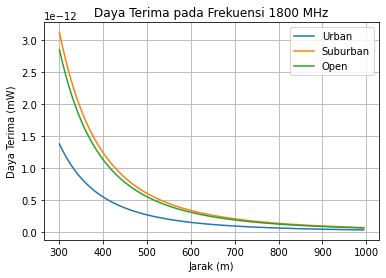

In [7]:
#Grafik PRx pada Frekuensi 1800 MHz
x = d[np.argsort(d)]
y1 = prx_urban[np.argsort(d)]
y2 = prx_suburban[np.argsort(d)]
y3 = prx_open[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='Urban')
plt.plot(x, y2, label='Suburban')
plt.plot(x, y3, label='Open')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.title('Daya Terima pada Frekuensi 1800 MHz')
plt.legend(loc='upper right')
plt.show()

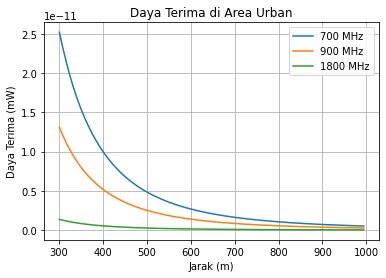

In [8]:
#Grafik PRx Area Urban
x = d[np.argsort(d)]
y1 = prx_freq1[np.argsort(d)]
y2 = prx_freq2[np.argsort(d)]
y3 = prx_freq3[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='700 MHz')
plt.plot(x, y2, label='900 MHz')
plt.plot(x, y3, label='1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (mW)')
plt.title('Daya Terima di Area Urban')
plt.legend(loc='upper right')
plt.show()

In [9]:
#Fungsi SNR
def snr (prx,bw) :
  noise_dbm = -174 + (10 * np.log10(bw)) #dBm
  noise = 10**(noise_dbm/10) #numerik
  SNR = prx/noise
  return SNR

#SNR Area
snr_urban = snr(prx_urban,B)
snr_suburban = snr(prx_suburban,B)
snr_open = snr(prx_open,B)

#SNR Frequency
snr_freq1 = snr(prx_freq1,B)
snr_freq2 = snr(prx_freq2,B)
snr_freq3 = snr(prx_freq3,B)

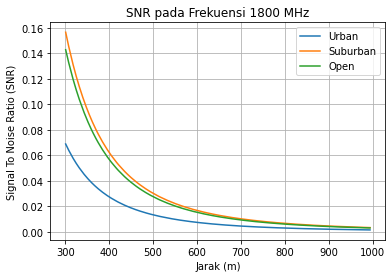

In [10]:
#Grafik SNR pada 1800 MHz
x = d[np.argsort(d)]
y1 = snr_urban[np.argsort(d)]
y2 = snr_suburban[np.argsort(d)]
y3 = snr_open[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='Urban')
plt.plot(x, y2, label='Suburban')
plt.plot(x, y3, label='Open')
plt.xlabel('Jarak (m)')
plt.ylabel('Signal To Noise Ratio (SNR)')
plt.title('SNR pada Frekuensi 1800 MHz')
plt.legend(loc='upper right')
plt.show()

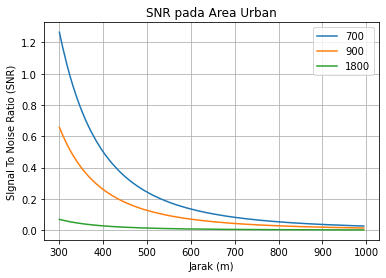

In [11]:
#Grafik SNR Area Urban
x = d[np.argsort(d)]
y1 = snr_freq1[np.argsort(d)]
y2 = snr_freq2[np.argsort(d)]
y3 = snr_freq3[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='700')
plt.plot(x, y2, label='900')
plt.plot(x, y3, label='1800')
plt.xlabel('Jarak (m)')
plt.ylabel('SIgnal To Noise Ratio (SNR)')
plt.title('SNR pada Area Urban')
plt.legend(loc='upper right')
plt.show()

In [12]:
#Fungsi Kapasitas Seluler
def kapasitas(snr,bw) :
  cell = bw * (np.log2(1 + snr))
  return cell

#Kapasitas Seluler untuk Area
cell_urban = kapasitas (snr_urban,B)
cell_suburban = kapasitas (snr_suburban,B)
cell_open = kapasitas (snr_open,B)

#Kapasitas Seluler untuk Frequency
cell_freq1 = kapasitas (snr_freq1,B)
cell_freq2 = kapasitas (snr_freq2,B)
cell_freq3 = kapasitas (snr_freq3,B)

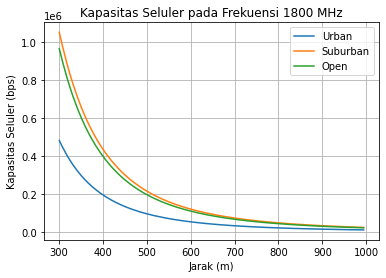

In [13]:
#Grafik Kapasitas Seluler pada Frekuensi 1800 MHz
x = d[np.argsort(d)]
y1 = cell_urban[np.argsort(d)]
y2 = cell_suburban[np.argsort(d)]
y3 = cell_open[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='Urban')
plt.plot(x, y2, label='Suburban')
plt.plot(x, y3, label='Open')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.title('Kapasitas Seluler pada Frekuensi 1800 MHz')
plt.legend(loc='upper right')
plt.show()

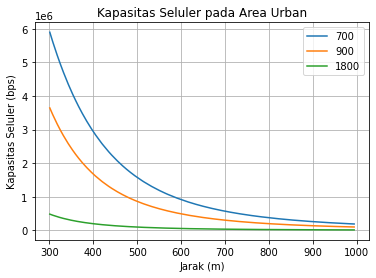

In [14]:
#Grafik Kapasitas Seluler Area Urban
x = d[np.argsort(d)]
y1 = cell_freq1[np.argsort(d)]
y2 = cell_freq2[np.argsort(d)]
y3 = cell_freq3[np.argsort(d)]

plt.figure()
plt.grid(True)
plt.plot(x, y1, label='700')
plt.plot(x, y2, label='900')
plt.plot(x, y3, label='1800')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas Seluler (bps)')
plt.title('Kapasitas Seluler pada Area Urban')
plt.legend(loc='upper right')
plt.show()